In [3]:
import pandas as pd
import numpy as np

In [2]:
# Начинаем с серии

lst = ['asd', 'qwe', None, np.nan, 'asdf']

In [3]:
s = pd.Series(lst)

In [4]:
s.isnull()

0    False
1    False
2     True
3     True
4    False
dtype: bool

In [7]:
# эта функция является маской:

s[s.isnull()]
s[~s.isnull()]
s[s.notnull()]

0     asd
1     qwe
4    asdf
dtype: object

In [ ]:
# Еще возможности фильтрации nan

In [8]:
from numpy import nan as NA

In [9]:
s2 = pd.Series([10, NA, 40, NA, 100])

In [10]:
s2

0     10.0
1      NaN
2     40.0
3      NaN
4    100.0
dtype: float64

In [12]:
s2.dropna()

0     10.0
2     40.0
4    100.0
dtype: float64

In [13]:
s2

0     10.0
1      NaN
2     40.0
3      NaN
4    100.0
dtype: float64

In [14]:
df = pd.DataFrame([[1,7,9],[2, NA, NA],[NA, NA, NA],[NA, 10, 4]])

In [15]:
df

,0,1,2
0,1.0,7.0,9.0
1,2.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,10.0,4.0


In [16]:
df11 = df.dropna()

In [17]:
# по умолчанию идем по строкам
# в итоге остаются только строчки где нет ни одного пропуска
df11

,0,1,2
0,1.0,7.0,9.0


In [20]:
# если надо удалять только строки, в которых все nan - нет ни одного значения вообще прописываем параметр how

In [21]:
df11 = df.dropna(how = 'all')

In [22]:
df11

,0,1,2
0,1.0,7.0,9.0
1,2.0,NaN,NaN
3,NaN,10.0,4.0


In [23]:
df11 = df.dropna(axis = 1, how = 'all')

In [24]:
df11

,0,1,2
0,1.0,7.0,9.0
1,2.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,10.0,4.0


In [ ]:
# Параметром thresh 

# мы можем сообщать функции dropna сколько не пустых значений должно 
# быть в нашей строке/колонке. Например, если thresh=3, то функция dropna будет проверять 
# чтобы в строке/колонке было минимум 3 непропущенных значения. Если больше, то хорошо, 
# а вот если меньше, то такая строка будет удалена.

In [2]:
# Задание 

# На вход функции подаётся датафрейм:


_df = pd.DataFrame([[0, np.nan, np.nan, 3, 4, 5, 6, 7, 8, np.nan],
                    [np.nan, 11, np.nan, 13, 14, 15, 16, 17, 18, np.nan],
                    [np.nan, np.nan, 22, 23, 24, 25, 26, 27, 28, np.nan],
                    [30, 31, 32, 33, 34, np.nan, 36, 37, 38, np.nan],
                    [40, 41, np.nan, 43, 44, 45, 46, 47, 48, np.nan],
                    [50, 51, 52, np.nan, 54, 55, np.nan, 57, 58, np.nan],
                    [60, 61, 62, 63, 64, np.nan, 66, 67, np.nan, np.nan],
                    [np.nan, 71, 72, 73, 74, 75, 76, 77, 78, np.nan],
                    [80, 81, 82, 83, 84, 85, np.nan, 87, 88, np.nan],
                    [90, 91, 92, 93, 94, 95, 96, 97, 98, np.nan]],
                   columns=["A", "B", "C", "D", "E", "F", "G", "H", "J", "K"])

# При помощи функции dropna удалите колонки в которых полностью отсутствуют значения (везде NaN)

In [3]:
_df.dropna(axis = 1, how = 'all')

,A,B,C,D,E,F,G,H,J
0,0.0,NaN,NaN,3.0,4,5.0,6.0,7,8.0
1,NaN,11.0,NaN,13.0,14,15.0,16.0,17,18.0
2,NaN,NaN,22.0,23.0,24,25.0,26.0,27,28.0
3,30.0,31.0,32.0,33.0,34,NaN,36.0,37,38.0
4,40.0,41.0,NaN,43.0,44,45.0,46.0,47,48.0
5,50.0,51.0,52.0,NaN,54,55.0,NaN,57,58.0
6,60.0,61.0,62.0,63.0,64,NaN,66.0,67,NaN
7,NaN,71.0,72.0,73.0,74,75.0,76.0,77,78.0
8,80.0,81.0,82.0,83.0,84,85.0,NaN,87,88.0
9,90.0,91.0,92.0,93.0,94,95.0,96.0,97,98.0


In [32]:
# При помощи функции dropna удалите строчки, где в ячейках А, С, D, G меньше трех значений 
# (т.е. строки с двумя и более пропущенными значениями в ячейках А, С, D, G должны быть удалены;
#  c одним пропуском - ок)

_df.columns

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'J', 'K'], dtype='object')

In [74]:
_df1 = _df[['A', 'C', 'D', 'G']]

In [75]:
_df1

,A,C,D,G
0,0.0,NaN,3.0,6.0
1,NaN,NaN,13.0,16.0
2,NaN,22.0,23.0,26.0
3,30.0,32.0,33.0,36.0
4,40.0,NaN,43.0,46.0
5,50.0,52.0,NaN,NaN
6,60.0,62.0,63.0,66.0
7,NaN,72.0,73.0,76.0
8,80.0,82.0,83.0,NaN
9,90.0,92.0,93.0,96.0


In [76]:
_df1.dropna(thresh=3).index

Int64Index([0, 2, 3, 4, 6, 7, 8, 9], dtype='int64')

In [95]:
_df.loc[_df1.dropna(thresh=3).index]

,A,B,C,D,E,F,G,H,J,K
0,0.0,NaN,NaN,3.0,4,5.0,6.0,7,8.0,NaN
2,NaN,NaN,22.0,23.0,24,25.0,26.0,27,28.0,NaN
3,30.0,31.0,32.0,33.0,34,NaN,36.0,37,38.0,NaN
4,40.0,41.0,NaN,43.0,44,45.0,46.0,47,48.0,NaN
6,60.0,61.0,62.0,63.0,64,NaN,66.0,67,NaN,NaN
7,NaN,71.0,72.0,73.0,74,75.0,76.0,77,78.0,NaN
8,80.0,81.0,82.0,83.0,84,85.0,NaN,87,88.0,NaN
9,90.0,91.0,92.0,93.0,94,95.0,96.0,97,98.0,NaN


In [ ]:
# Не пользуясь функцией dropna, отфильтруйте датафрейм так чтобы остались строчки, где в ячейках C и G нет пропусков.

In [98]:
_df

,A,B,C,D,E,F,G,H,J,K
0,0.0,NaN,NaN,3.0,4,5.0,6.0,7,8.0,NaN
1,NaN,11.0,NaN,13.0,14,15.0,16.0,17,18.0,NaN
2,NaN,NaN,22.0,23.0,24,25.0,26.0,27,28.0,NaN
3,30.0,31.0,32.0,33.0,34,NaN,36.0,37,38.0,NaN
4,40.0,41.0,NaN,43.0,44,45.0,46.0,47,48.0,NaN
5,50.0,51.0,52.0,NaN,54,55.0,NaN,57,58.0,NaN
6,60.0,61.0,62.0,63.0,64,NaN,66.0,67,NaN,NaN
7,NaN,71.0,72.0,73.0,74,75.0,76.0,77,78.0,NaN
8,80.0,81.0,82.0,83.0,84,85.0,NaN,87,88.0,NaN
9,90.0,91.0,92.0,93.0,94,95.0,96.0,97,98.0,NaN


In [97]:
_df[['C', 'G']]

,C,G
0,NaN,6.0
1,NaN,16.0
2,22.0,26.0
3,32.0,36.0
4,NaN,46.0
5,52.0,NaN
6,62.0,66.0
7,72.0,76.0
8,82.0,NaN
9,92.0,96.0


In [124]:
_df['C'].notna() & _df['G'].notna()

0    False
1    False
2     True
3     True
4    False
5    False
6     True
7     True
8    False
9     True
dtype: bool

In [125]:
_df[_df['C'].notna() & _df['G'].notna()]

,A,B,C,D,E,F,G,H,J,K
2,NaN,NaN,22.0,23.0,24,25.0,26.0,27,28.0,NaN
3,30.0,31.0,32.0,33.0,34,NaN,36.0,37,38.0,NaN
6,60.0,61.0,62.0,63.0,64,NaN,66.0,67,NaN,NaN
7,NaN,71.0,72.0,73.0,74,75.0,76.0,77,78.0,NaN
9,90.0,91.0,92.0,93.0,94,95.0,96.0,97,98.0,NaN


# Заполнение пропущенных значений

In [127]:
_df

,A,B,C,D,E,F,G,H,J,K
0,0.0,NaN,NaN,3.0,4,5.0,6.0,7,8.0,NaN
1,NaN,11.0,NaN,13.0,14,15.0,16.0,17,18.0,NaN
2,NaN,NaN,22.0,23.0,24,25.0,26.0,27,28.0,NaN
3,30.0,31.0,32.0,33.0,34,NaN,36.0,37,38.0,NaN
4,40.0,41.0,NaN,43.0,44,45.0,46.0,47,48.0,NaN
5,50.0,51.0,52.0,NaN,54,55.0,NaN,57,58.0,NaN
6,60.0,61.0,62.0,63.0,64,NaN,66.0,67,NaN,NaN
7,NaN,71.0,72.0,73.0,74,75.0,76.0,77,78.0,NaN
8,80.0,81.0,82.0,83.0,84,85.0,NaN,87,88.0,NaN
9,90.0,91.0,92.0,93.0,94,95.0,96.0,97,98.0,NaN


In [128]:
_df.fillna(0)

,A,B,C,D,E,F,G,H,J,K
0,0.0,0.0,0.0,3.0,4,5.0,6.0,7,8.0,0.0
1,0.0,11.0,0.0,13.0,14,15.0,16.0,17,18.0,0.0
2,0.0,0.0,22.0,23.0,24,25.0,26.0,27,28.0,0.0
3,30.0,31.0,32.0,33.0,34,0.0,36.0,37,38.0,0.0
4,40.0,41.0,0.0,43.0,44,45.0,46.0,47,48.0,0.0
5,50.0,51.0,52.0,0.0,54,55.0,0.0,57,58.0,0.0
6,60.0,61.0,62.0,63.0,64,0.0,66.0,67,0.0,0.0
7,0.0,71.0,72.0,73.0,74,75.0,76.0,77,78.0,0.0
8,80.0,81.0,82.0,83.0,84,85.0,0.0,87,88.0,0.0
9,90.0,91.0,92.0,93.0,94,95.0,96.0,97,98.0,0.0


In [129]:
# Кастомизируем заполнение ячеек:

_df.fillna({'A': 0, 'B': 'hui'})

,A,B,C,D,E,F,G,H,J,K
0,0.0,hui,NaN,3.0,4,5.0,6.0,7,8.0,NaN
1,0.0,11.0,NaN,13.0,14,15.0,16.0,17,18.0,NaN
2,0.0,hui,22.0,23.0,24,25.0,26.0,27,28.0,NaN
3,30.0,31.0,32.0,33.0,34,NaN,36.0,37,38.0,NaN
4,40.0,41.0,NaN,43.0,44,45.0,46.0,47,48.0,NaN
5,50.0,51.0,52.0,NaN,54,55.0,NaN,57,58.0,NaN
6,60.0,61.0,62.0,63.0,64,NaN,66.0,67,NaN,NaN
7,0.0,71.0,72.0,73.0,74,75.0,76.0,77,78.0,NaN
8,80.0,81.0,82.0,83.0,84,85.0,NaN,87,88.0,NaN
9,90.0,91.0,92.0,93.0,94,95.0,96.0,97,98.0,NaN


In [131]:
# более продвинутые способы заполнения значений

# Методы заполнения:

# method='ffill':  распространяет последнее наблюдаемое значение вперед, пока не встретится другое значение.
# method='bfill':  распространяет первое наблюдаемое значение назад, пока не встретится другое значение.


# регулируем как заполнять:

df3 = pd.DataFrame(np.random.rand(6, 3))
df3.iloc[2:, 1] = np.NaN
df3.iloc[4:, 2] = np.NaN


In [133]:
df3

,0,1,2
0,0.538274,0.267049,0.550702
1,0.001706,0.557345,0.973431
2,0.978978,NaN,0.392511
3,0.884089,NaN,0.900421
4,0.178159,NaN,NaN
5,0.579322,NaN,NaN


In [135]:
df3.fillna(method = 'ffill')

,0,1,2
0,0.538274,0.267049,0.550702
1,0.001706,0.557345,0.973431
2,0.978978,0.557345,0.392511
3,0.884089,0.557345,0.900421
4,0.178159,0.557345,0.900421
5,0.579322,0.557345,0.900421


In [137]:
# заполняет вперед заданное количество ячеек

df3.fillna(method = 'ffill', limit = 1)

,0,1,2
0,0.538274,0.267049,0.550702
1,0.001706,0.557345,0.973431
2,0.978978,0.557345,0.392511
3,0.884089,NaN,0.900421
4,0.178159,NaN,0.900421
5,0.579322,NaN,NaN


In [139]:
df3

,0,1,2
0,0.538274,0.267049,0.550702
1,0.001706,0.557345,0.973431
2,0.978978,NaN,0.392511
3,0.884089,NaN,0.900421
4,0.178159,NaN,NaN
5,0.579322,NaN,NaN


In [140]:
df3.iloc[0, 0] = NA

In [141]:
df3

,0,1,2
0,NaN,0.267049,0.550702
1,0.001706,0.557345,0.973431
2,0.978978,NaN,0.392511
3,0.884089,NaN,0.900421
4,0.178159,NaN,NaN
5,0.579322,NaN,NaN


In [142]:
# вышестоящие ячейки с методом 'bfill' заполняются значениями нижестоящих:

df3.fillna(method = 'bfill')

,0,1,2
0,0.001706,0.267049,0.550702
1,0.001706,0.557345,0.973431
2,0.978978,NaN,0.392511
3,0.884089,NaN,0.900421
4,0.178159,NaN,NaN
5,0.579322,NaN,NaN


In [ ]:
# Вы можете встретить в чужом коде method='pad' - это аналог method='ffill'. 

# Если вы встретите method='backfill'-это аналог method='bfill'.

In [ ]:
## заполнение на основе среднего значения

In [143]:
lst = [5, 6, None, np.nan, 8]

In [144]:
s = pd.Series(lst)

In [145]:
s.fillna(s.mean())

0    5.000000
1    6.000000
2    6.333333
3    6.333333
4    8.000000
dtype: float64

# Проверяем данные на дубликаты и избавляемся от них

In [146]:
df = pd.DataFrame({'group_name': ['A', 'B', 'A', 'B', 'A', 'B', 'B'],
                  'group_value': [10, 10, 20, 30, 30, 40, 40]})

In [147]:
df

,group_name,group_value
0,A,10
1,B,10
2,A,20
3,B,30
4,A,30
5,B,40
6,B,40


In [148]:
# по всему датафрейму - ответ на вопрос - является ли строка дубликатом или нет:

df.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [ ]:
# У функции duplicated можно поменять режим проверки дубликатов при помощи параметра keep:

# keep = 'first': пометить дубликаты как True, за исключением первого вхождения. 
# Т.е. первое значение не будет считаться дубликатом.

# keep = 'last': пометить дубликаты как True, за исключением последнего вхождения.
# Т.е. последнее значение не будет считаться дубликатом.

# keep = False : пометить все дубликаты как True. Т.е. все значения будут считаться дубликатами.

In [149]:
df[df.duplicated()]

,group_name,group_value
6,B,40


In [150]:
df.drop_duplicates()

,group_name,group_value
0,A,10
1,B,10
2,A,20
3,B,30
4,A,30
5,B,40


In [151]:
# выше расчет идет по двум колонкам. По group_name и group_value

# если мы хотим, чтобы дубли ловились только по одной колонке, например только по group_name:

df.drop_duplicates('group_name')

,group_name,group_value
0,A,10
1,B,10


In [ ]:
# Параметр keep у функции drop_duplicates очень важен и вы часто будете его задавать! 
    
# Он определяет, какие дубликаты (если они есть) нужно сохранить. Вот значения, которые может принимать параметр keep:

# - first : удалить дубликаты, кроме первого вхождения.

# - last : удалить дубликаты, кроме последнего вхождения.

# - False : удалить все дубликаты.

# Функция map() заточена на работу с Сериями и словарями

In [4]:
airport_data = pd.DataFrame({'airline': ['Air China', 'Jet Airways', 'Aeroflot', 'easyJet'], 'planes': [10, 4, 30, 2]})
country = {'Air China': 'China', 'Jet Airways': 'India', 'Aeroflot': 'Russia', 'easyJet': 'United Kingdom'}

In [153]:
airport_data

,airline,planes
0,Air China,10
1,Jet Airways,4
2,Aeroflot,30
3,easyJet,2


In [5]:
# функция map пробегает по всем ключам в словаре country и подставляет в Series значения этого словаря

# осуществляется перевод по словарю функцией map(dictionary)

airport_data['airline'].map(country)

0             China
1             India
2            Russia
3    United Kingdom
Name: airline, dtype: object

In [6]:
airport_data['country'] = airport_data['airline'].map(country)

In [7]:
airport_data

,airline,planes,country
0,Air China,10,China
1,Jet Airways,4,India
2,Aeroflot,30,Russia
3,easyJet,2,United Kingdom


In [8]:
#В функцию map() вместо словаря можно передать и Серию:
    
ss = pd.Series([1,2,3,4], index = ['Air China', 'Jet Airways', 'Aeroflot', 'easyJet'])

airport_data['airline'].map(ss)

0    1
1    2
2    3
3    4
Name: airline, dtype: int64

In [11]:
# Добавлять что-то к строке датафрейма:

airport_data['airline'] + ' #'

0      Air China #
1    Jet Airways #
2       Aeroflot #
3        easyJet #
Name: airline, dtype: object

In [12]:
# также можно сделать через функцию:

def funk(value):
    return value + ' *'

airport_data['airline'].map(funk)

0      Air China *
1    Jet Airways *
2       Aeroflot *
3        easyJet *
Name: airline, dtype: object

In [ ]:
# Задания!

In [13]:
# На вход функции подается датафрейм, который содержит информацию о предпочитаемом классе в самолете для некоторых клиентов:
    
dic = {'client':['Sergey','Viktor','Pavel','Andrey','Petr'],'class':['A','B','A','C','D']}
df = pd.DataFrame(dic)

# В функцию также передается словарь, в котором лежит расшифровка каждого класса:
data = {'a':'business','b':'comfort','c':'econom','d':'promo'}

# Примените функцию map для создания дополнительного столбца class-info, который расшифровывает букву класса:

In [14]:
df

,client,class
0,Sergey,A
1,Viktor,B
2,Pavel,A
3,Andrey,C
4,Petr,D


In [19]:
df['class-info'] = df['class'].str.lower().map(data)

In [20]:
df

,client,class,class-info
0,Sergey,A,business
1,Viktor,B,comfort
2,Pavel,A,business
3,Andrey,C,econom
4,Petr,D,promo


In [61]:
# Задание.

# Заполните пропуски по следующим правилам: ЗАПОЛНИТЕ ПРОПУСКИ


# Столбец А: 0
# Столбец B: среднее значение из столбца Е
# Столбец С: максимальное значение из столбца H
# Стобец F: по методу ffill
# Столбец G: по методу bfill

# Дополнительно:

# Удалите столбец в котором все значения пропущены. Функцию drop не использовать!
# Удалите строки, в которых хотя бы одно значение пропущено

df = pd.DataFrame([[0, np.nan, np.nan, 3, 4, 5, 6, 7, 8, np.nan],

                    [np.nan, 11, np.nan, 13, 14, 15, 16, 17, 18, np.nan],

                    [np.nan, np.nan, 22, 23, 24, 25, 26, 27, 28, np.nan],

                    [30, 31, 32, 33, 34, np.nan, 36, 37, 38, np.nan],

                    [40, 41, np.nan, 43, 44, 45, 46, 47, 48, np.nan],

                    [50, 51, 52, np.nan, 54, 55, np.nan, 57, 58, np.nan],

                    [60, 61, 62, 63, 64, np.nan, 66, 67, np.nan, np.nan],

                    [np.nan, 71, 72, 73, 74, 75, 76, 77, 78, np.nan],

                    [80, 81, 82, 83, 84, 85, np.nan, 87, 88, np.nan],

                    [90, 91, 92, 93, 94, 95, 96, 97, 98, np.nan]],

                   columns=["A", "B", "C", "D", "E", "F", "G", "H", "J", "K"])

In [63]:
df['A'] = df['A'].fillna(0)

In [55]:
df['B'] = df['B'].fillna(df['E'].mean())

In [56]:
df['C'] = df['B'].fillna(df['H'].max())

In [57]:
df['F'] = df['F'].fillna(method = 'ffill')

In [58]:
df['G'] = df['G'].fillna(method = 'bfill')

In [59]:
df = df.dropna(how = 'all', axis = 1)

In [60]:
df.dropna()

,A,B,C,D,E,F,G,H,J
0,0,49.0,97,3.0,4,5.0,6.0,7,8.0
1,0,49.0,97,13.0,14,15.0,16.0,17,18.0
2,0,49.0,97,23.0,24,25.0,26.0,27,28.0
3,0,49.0,97,33.0,34,25.0,36.0,37,38.0
4,0,49.0,97,43.0,44,45.0,46.0,47,48.0
7,0,49.0,97,73.0,74,75.0,76.0,77,78.0
8,0,49.0,97,83.0,84,85.0,96.0,87,88.0
9,0,49.0,97,93.0,94,95.0,96.0,97,98.0


In [64]:
df['A'] = df['A'].fillna(0)
df['B'] = df['B'].fillna(df['E'].mean())
df['C'] = df['B'].fillna(df['H'].max())
df['F'] = df['F'].fillna(method = 'ffill')
df['G'] = df['G'].fillna(method = 'bfill')
df = df.dropna(how = 'all', axis = 1)
result = df.dropna()

In [3]:
# Задание

# Найдите все повторяющиеся записи в датафрейме. 

# Функция должна вернуть новый датафрейм в котором будут оригинал записи + его дубликаты. 
# Записи, которые не имеют дубликатов не должны попасть в новый датафрейм.

dic = {'client':['Sergey','Viktor','Pavel','Andrey','Petr', 'Sergey'],'class':['A','B','A','C','D', 'A']}
df = pd.DataFrame(dic)

In [4]:
df.sort_values(by = 'client')

,client,class
3,Andrey,C
2,Pavel,A
4,Petr,D
0,Sergey,A
5,Sergey,A
1,Viktor,B


In [5]:
df.duplicated(keep = False)

0     True
1    False
2    False
3    False
4    False
5     True
dtype: bool

In [6]:
df[df.duplicated(keep = False)]

,client,class
0,Sergey,A
5,Sergey,A


In [7]:
df.drop_duplicates(keep = False)

,client,class
1,Viktor,B
2,Pavel,A
3,Andrey,C
4,Petr,D


In [2]:
# Параметр keep у функции drop_duplicates очень важен и вы часто будете его задавать! 
    
# Он определяет, какие дубликаты (если они есть) нужно сохранить. Вот значения, которые может принимать параметр keep:

# - first : удалить дубликаты, кроме первого вхождения.

# - last : удалить дубликаты, кроме последнего вхождения.

# - False : удалить все дубликаты.

# Про замену значений и дискретизацию

In [113]:
temp = pd.Series([24, -9999, 22, -8888, 18, 26, -9999])

In [114]:
temp

0      24
1   -9999
2      22
3   -8888
4      18
5      26
6   -9999
dtype: int64

In [83]:
# replace всех значений в листе на nan (или одного значения - тогда уже без [])
temp.replace([-9999, -8888], np.nan)

0    24.0
1     NaN
2    22.0
3     NaN
4    18.0
5    26.0
6     NaN
dtype: float64

In [84]:
# replace каждого значения в списке [] на другое значение в другом списке []
temp.replace([-9999, -8888], [np.nan, -1])

0    24.0
1     NaN
2    22.0
3    -1.0
4    18.0
5    26.0
6     NaN
dtype: float64

In [115]:
# replace можно делать через словарь:
temp.replace({-9999: 'F',  -8888: 'M'})

0    24
1     F
2    22
3     M
4    18
5    26
6     F
dtype: object

### Замена и модификация лэйблов строк и столбцов

In [4]:
# Сначала зададим df с которым будем работать:

df = pd.DataFrame({'airline': ['Air China', 'Jet Airways', 'Aeroflot', 'easyJet'], 'planes': [10, 4, 30, 2]})
country = {'Air China': 'China', 'Jet Airways': 'India', 'Aeroflot': 'Russia', 'easyJet': 'United Kingdom'}

In [165]:
def funk(x):
    if x == 'Aeroflot':
        return 'RU'
    return 'not-RU'


In [ ]:
# применение map c функцией! 

df['is_russia'] = df['airline'].map(funk)

In [166]:
df.index = df['airline']

In [167]:
df

,airline,planes,is_russia
airline,,,
Air China,Air China,10,not-RU
Jet Airways,Jet Airways,4,not-RU
Aeroflot,Aeroflot,30,RU
easyJet,easyJet,2,not-RU


In [112]:
# 1. Замена/изменение индекса

# смотрим на индексы:
df.index

Index(['Air China', 'Jet Airways', 'Aeroflot', 'easyJet'], dtype='object', name='airline')

In [168]:
# пишем функцию замены индекса по правилу - первые пять символов должны быть upper:

def rename_index(x):
    return x[:5].upper()

In [169]:
df.index = df.index.map(rename_index)

In [170]:
df

,airline,planes,is_russia
airline,,,
AIR C,Air China,10,not-RU
JET A,Jet Airways,4,not-RU
AEROF,Aeroflot,30,RU
EASYJ,easyJet,2,not-RU


In [ ]:
# С применением lambda функции

In [159]:
# 1 - зададим обычную функцию:
def rename_columns(x):
    return x.upper()
df.columns = df.columns.map(rename_columns)

In [175]:
# применение map с lambda функцией:

# вместо этй многострочной функции - зададим lambda функцию:

lambda_rename_columns = lambda x: x.upper()
df.columns = df.columns.map(lambda_rename_columns)


# или сразу
df.columns = df.columns.map(lambda x: x.upper())

In [176]:
df

,AIRLINE,PLANES
0,Air China,10
1,Jet Airways,4
2,Aeroflot,30
3,easyJet,2


### rename columns & index

In [5]:
df

,airline,planes
0,Air China,10
1,Jet Airways,4
2,Aeroflot,30
3,easyJet,2


In [10]:
# rename colomns
df.rename(columns = {'airline': 'qwerty', 'planes': 'poiuyt'})

,qwerty,poiuyt
0,Air China,10
1,Jet Airways,4
2,Aeroflot,30
3,easyJet,2


In [ ]:
# rename index

In [11]:
df.rename(index = {0:'a', 1:'b', 2: 'c'})

,airline,planes
a,Air China,10
b,Jet Airways,4
c,Aeroflot,30
3,easyJet,2


In [ ]:
# rename colomns & index

In [13]:
df.rename(columns = {'airline': 'qwerty', 'planes': 'poiuyt'}, index = {0:'a', 1:'b', 2: 'c'})

,qwerty,poiuyt
a,Air China,10
b,Jet Airways,4
c,Aeroflot,30
3,easyJet,2


# Группировка

In [15]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

In [ ]:
# определяем группы:

18 - 25
26 - 35
36 - 60
61 - 100

In [17]:
# задаем соответствующие интервалы bins

bins = [18, 25, 35, 60, 100]

In [18]:
# функция pd.cut разделяет всю коллекцию на равные интервалы и смотрит сколько в каждый bin попало значений
# (в отличае от функции pd.qcut - которая делит все значения на равное количество и уже потом строит интервалы для них)

pd.cut(ages, bins)

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64, right]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [21]:
# регулирует отркытые и заркытые интервалы справа/слева

pd.cut(ages, bins, right = False)

[[18, 25), [18, 25), [25, 35), [25, 35), [18, 25), ..., [25, 35), [60, 100), [35, 60), [35, 60), [25, 35)]
Length: 12
Categories (4, interval[int64, left]): [[18, 25) < [25, 35) < [35, 60) < [60, 100)]

In [22]:
result = pd.cut(ages, bins)

In [23]:
result.categories

IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]], dtype='interval[int64, right]')

In [24]:
result.categories[0]

Interval(18, 25, closed='right')

In [25]:
result.categories[1]

Interval(25, 35, closed='right')

In [26]:
# здесь показывается к какому индексу категории относится то или иное значение в ages

result.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

In [28]:
## Чтобы посчитать сколько в каждом интервале значений:

pd.value_counts(result)

(18, 25]     5
(25, 35]     3
(35, 60]     3
(60, 100]    1
dtype: int64

In [29]:
# задаём лейблы:

ages

[20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

In [31]:
bins

[18, 25, 35, 60, 100]

In [34]:
result = pd.cut(ages, bins, labels = ["Young", "Middle", "Adult", "Senior"])

In [35]:
result

['Young', 'Young', 'Young', 'Middle', 'Young', ..., 'Middle', 'Senior', 'Adult', 'Adult', 'Middle']
Length: 12
Categories (4, object): ['Young' < 'Middle' < 'Adult' < 'Senior']

In [40]:
result.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

In [41]:
pd.value_counts(result)

Young     5
Middle    3
Adult     3
Senior    1
dtype: int64

In [42]:
car_gas = [200, 220, 205, 207, 201, 230, 307, 310, 601, 405, 401, 302]

In [47]:
rez = pd.cut(car_gas, 10)

<Axes: >

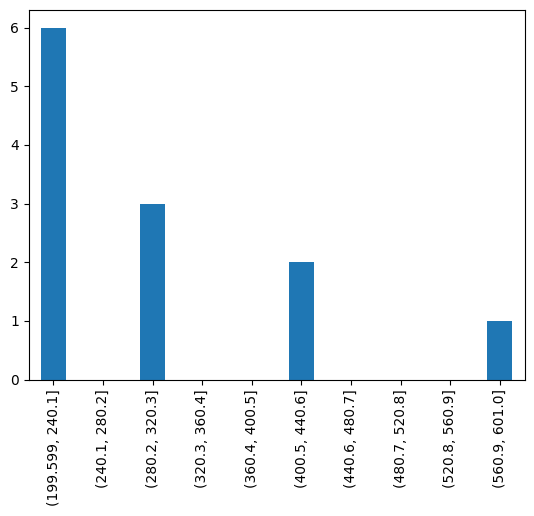

In [54]:
rez.value_counts().plot(kind = 'bar')

In [55]:
# Задача

s = pd.Series([8, 9, 2, 0, 3 ,8, 3, 9, 6, 5])

In [56]:
s

0    8
1    9
2    2
3    0
4    3
5    8
6    3
7    9
8    6
9    5
dtype: int64

In [75]:
# разделяем на интервалы. 
# первый интервал задается -1 - это значит первый интервал от 0 до 4:

bins = [-1, 4, 7, 10]

In [76]:
# перед тем, как задавать labels необходимо проверить result.categories чтобы посмотреть значения разбивки интервалов
result = pd.cut(s.values, bins)

In [77]:
result.categories

IntervalIndex([(-1, 4], (4, 7], (7, 10]], dtype='interval[int64, right]')

In [82]:
result = pd.cut(s.values, bins, labels = ['Плохо', 'Так себе', 'Отлично'])

In [83]:
result.categories

Index(['Плохо', 'Так себе', 'Отлично'], dtype='object')

In [80]:
result

['Отлично', 'Отлично', 'Плохо', 'Плохо', 'Плохо', 'Отлично', 'Плохо', 'Отлично', 'Так себе', 'Так себе']
Categories (3, object): ['Плохо' < 'Так себе' < 'Отлично']

In [81]:
result.value_counts()

Плохо       4
Так себе    2
Отлично     4
dtype: int64

In [9]:
# # Задача

# Исправить функцию:    
   
# import pandas as pd

# """
# На вход функции get_sklad_number подается имя склада
# Функция разбивает имя склада на слово Sklad и его номер
# Номер склада преобразуется из str в int
# Функция возвращает номер склада
# """
# def get_sklad_number():
#     sklad_number = sklad_name.split(' ')[1]
#     number_as_int = int(sklad_number)
#     return number_as_int

# def solution(s1):
#     result = s1.map(get_sklad_number())
#     return result    

In [32]:
def get_sklad_number(sklad_name):
    sklad_number = sklad_name.split(' ')[1]
    number_as_int = int(sklad_number)
    return number_as_int

def solution(s1):
    result = s1.map(get_sklad_number)
    print (result)    

In [33]:
s1 = pd.Series(['Sklad 1', 'Sklad 2', 'Sklad 3'])
solution(s1)

0    1
1    2
2    3
dtype: int64


In [208]:
## Задача

df = pd.DataFrame({'Веб-сайт': ['google.cm', 'youtube.com', 'facebook.cm',
                  'twitter.com', 'instagram.com', 'baidu.com', 'wikipedia.org',
                   'yandex.рф', 'yahoo.cm', 'whatsapp.om'], 'Просмотры': ['1', '2', '3',
                  '4', '5', '6', '7',
                   '8', '9', '10']})
df

,Веб-сайт,Просмотры
0,google.cm,1
1,youtube.com,2
2,facebook.cm,3
3,twitter.com,4
4,instagram.com,5
5,baidu.com,6
6,wikipedia.org,7
7,yandex.рф,8
8,yahoo.cm,9
9,whatsapp.om,10


In [169]:
# при помощи функции map(цикла) - разделяем каждое значение df['Веб-сайт'] по точке и берем элемент [1]
s1 = df['Веб-сайт'].map(lambda x : (x.split('.')[1]))

In [171]:
s1

0    com
1    com
2    com
3    com
4    com
5    com
6    org
7     ru
8    com
9    com
Name: Веб-сайт, dtype: object

In [165]:
# заменяем 
s1.replace({'cm':'com','рф':'ru','om':'com'})

0    com
1    com
2    com
3    com
4    com
5    com
6    org
7     ru
8    com
9    com
Name: Веб-сайт, dtype: object

In [172]:
# создаем еще одну серию с первым элементом до сплита по точке
s2 = df['Веб-сайт'].map(lambda x : (x.split('.')[0]))

In [173]:
# соединяем серии в одну серию df['Веб-сайт']
df['Веб-сайт'] = s2 + '.' + s1.replace({'cm':'com','рф':'ru','om':'com'})

In [187]:
df

,Веб-сайт,Просмотры
0,google.cm,1
1,youtube.com,2
2,facebook.cm,3
3,twitter.com,4
4,instagram.com,5
5,baidu.com,6
6,wikipedia.org,7
7,yandex.рф,8
8,yahoo.cm,9
9,whatsapp.om,10


In [221]:
df['Веб-сайт'].map(lambda x: (x.split('.')[0])+ '.' + 'ru')

0       google.ru
1      youtube.ru
2     facebook.ru
3      twitter.ru
4    instagram.ru
5        baidu.ru
6    wikipedia.ru
7       yandex.ru
8        yahoo.ru
9     whatsapp.ru
Name: Веб-сайт, dtype: object

# !!! Устранение выбросов !!!

In [33]:
df = pd.DataFrame({
    'IZM_1' : [-1.63, 0.51, -1.33, -0.83, 0.27, 1.28, 0.36, 2.01, -0.43, -0.52],
    'IZM_2' : [0.22, 0.41, -2.07, -0.74, -0.68, -0.62, 0.83, 0.30, -0.72, -0.14],
    'IZM_3' : [-0.31, 0.41, 1.26, -0.41, -0.62, -0.76, 0.02, 0.42, -1.48, 0.71]
}, index = ['TEST#1', 'TEST#2', 'TEST#3', 'TEST#4', 'TEST#5', 'TEST#6', 'TEST#7', 'TEST#8', 'TEST#9', 'TEST#10'])
df

,IZM_1,IZM_2,IZM_3
TEST#1,-1.63,0.22,-0.31
TEST#2,0.51,0.41,0.41
TEST#3,-1.33,-2.07,1.26
TEST#4,-0.83,-0.74,-0.41
TEST#5,0.27,-0.68,-0.62
TEST#6,1.28,-0.62,-0.76
TEST#7,0.36,0.83,0.02
TEST#8,2.01,0.30,0.42
TEST#9,-0.43,-0.72,-1.48
TEST#10,-0.52,-0.14,0.71


In [36]:
# правильная задача датафрейма
df = pd.DataFrame(np.random.randn(10, 3),
                   index=['TEST#' + str(i) for i in range(1, 11)],
                   columns=['IZM_' + str(i) for i in range (1,4)])

In [37]:
df

,IZM_1,IZM_2,IZM_3
TEST#1,0.248028,0.475186,0.228971
TEST#2,0.929629,-0.381543,1.175445
TEST#3,-0.195746,-0.287470,0.503468
TEST#4,0.875086,0.260893,-1.525968
TEST#5,-0.751578,2.128888,0.329170
TEST#6,0.183036,0.268395,-1.619239
TEST#7,-1.682281,0.385874,-0.095046
TEST#8,-1.188488,-0.567332,-1.406999
TEST#9,-0.002391,-0.028460,0.897636
TEST#10,-0.095710,0.104546,-1.922930


In [3]:
# условие только для IZM_3
df[(df['IZM_3']>1) |  (df['IZM_3'] < -1)]

,IZM_1,IZM_2,IZM_3
TEST#3,-1.33,-2.07,1.26
TEST#9,-0.43,-0.72,-1.48


In [228]:
# берем abs()
df[abs(df['IZM_3'])>1]

,IZM_1,IZM_2,IZM_3
TEST#3,-1.33,-2.07,1.26
TEST#9,-0.43,-0.72,-1.48


In [4]:
# mask.any() - задает условие если хотябы один True в строке (создает одномерную маску)

# mask.any(1) - то же самое, но в столбце

df[(np.abs(df)>1).any(1)]

C:\Users\roman\AppData\Local\Temp\ipykernel_57244\3823657092.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  df[(np.abs(df)>1).any(1)]


,IZM_1,IZM_2,IZM_3
TEST#1,-1.63,0.22,-0.31
TEST#3,-1.33,-2.07,1.26
TEST#6,1.28,-0.62,-0.76
TEST#8,2.01,0.30,0.42
TEST#9,-0.43,-0.72,-1.48


In [5]:
mask = np.abs(df)>1

In [8]:
mask

,IZM_1,IZM_2,IZM_3
TEST#1,True,False,False
TEST#2,False,False,False
TEST#3,True,True,True
TEST#4,False,False,False
TEST#5,False,False,False
TEST#6,True,False,False
TEST#7,False,False,False
TEST#8,True,False,False
TEST#9,False,False,True
TEST#10,False,False,False


In [9]:
# для каждого столбца по всем строкам проверяет есть ли хотя бы один True
mask.any()

IZM_1    True
IZM_2    True
IZM_3    True
dtype: bool

In [249]:
# для каждой строки по всем столбцам 
mask.any(1)

C:\Users\roman\AppData\Local\Temp\ipykernel_65596\3784093248.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  mask.any(1)


TEST#1      True
TEST#2     False
TEST#3      True
TEST#4     False
TEST#5     False
TEST#6      True
TEST#7     False
TEST#8      True
TEST#9      True
TEST#10    False
dtype: bool

In [250]:
df[mask.any(1)]

C:\Users\roman\AppData\Local\Temp\ipykernel_65596\92201544.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  df[mask.any(1)]


,IZM_1,IZM_2,IZM_3
TEST#1,-1.63,0.22,-0.31
TEST#3,-1.33,-2.07,1.26
TEST#6,1.28,-0.62,-0.76
TEST#8,2.01,0.30,0.42
TEST#9,-0.43,-0.72,-1.48


In [258]:
# мое первоначальное решение без any()

df[np.abs(df.values)>1].drop_duplicates(keep = 'first')

,IZM_1,IZM_2,IZM_3
TEST#1,-1.63,0.22,-0.31
TEST#3,-1.33,-2.07,1.26
TEST#6,1.28,-0.62,-0.76
TEST#8,2.01,0.30,0.42
TEST#9,-0.43,-0.72,-1.48


### Стратегия работы с выбросами

#### 1. Стратегия. Занулять выбросы

In [10]:
mask

,IZM_1,IZM_2,IZM_3
TEST#1,True,False,False
TEST#2,False,False,False
TEST#3,True,True,True
TEST#4,False,False,False
TEST#5,False,False,False
TEST#6,True,False,False
TEST#7,False,False,False
TEST#8,True,False,False
TEST#9,False,False,True
TEST#10,False,False,False


In [12]:
df[mask] = 0

In [14]:
df

,IZM_1,IZM_2,IZM_3
TEST#1,0.00,0.22,-0.31
TEST#2,0.51,0.41,0.41
TEST#3,0.00,0.00,0.00
TEST#4,-0.83,-0.74,-0.41
TEST#5,0.27,-0.68,-0.62
TEST#6,0.00,-0.62,-0.76
TEST#7,0.36,0.83,0.02
TEST#8,0.00,0.30,0.42
TEST#9,-0.43,-0.72,0.00
TEST#10,-0.52,-0.14,0.71


#### 2. Стратегия. 
#### Значения, которые меньше -1 приводим к значению -1
#### Значения, которые больше 1 приводим к значению 1

In [17]:
df

,IZM_1,IZM_2,IZM_3
TEST#1,-1.63,0.22,-0.31
TEST#2,0.51,0.41,0.41
TEST#3,-1.33,-2.07,1.26
TEST#4,-0.83,-0.74,-0.41
TEST#5,0.27,-0.68,-0.62
TEST#6,1.28,-0.62,-0.76
TEST#7,0.36,0.83,0.02
TEST#8,2.01,0.30,0.42
TEST#9,-0.43,-0.72,-1.48
TEST#10,-0.52,-0.14,0.71


In [18]:
# сначала находим выбросы
mask = df[np.abs(df) > 1]

In [19]:
mask

,IZM_1,IZM_2,IZM_3
TEST#1,-1.63,NaN,NaN
TEST#2,NaN,NaN,NaN
TEST#3,-1.33,-2.07,1.26
TEST#4,NaN,NaN,NaN
TEST#5,NaN,NaN,NaN
TEST#6,1.28,NaN,NaN
TEST#7,NaN,NaN,NaN
TEST#8,2.01,NaN,NaN
TEST#9,NaN,NaN,-1.48
TEST#10,NaN,NaN,NaN


In [21]:
# функция sign - определяет знака каждого элемента в датафрейме:

np.sign(df)

,IZM_1,IZM_2,IZM_3
TEST#1,-1.0,1.0,-1.0
TEST#2,1.0,1.0,1.0
TEST#3,-1.0,-1.0,1.0
TEST#4,-1.0,-1.0,-1.0
TEST#5,1.0,-1.0,-1.0
TEST#6,1.0,-1.0,-1.0
TEST#7,1.0,1.0,1.0
TEST#8,1.0,1.0,1.0
TEST#9,-1.0,-1.0,-1.0
TEST#10,-1.0,-1.0,1.0


In [ ]:
# для каждого значения True по маске можно вывести с помощью sign(df) - единицу или минус единицу

In [24]:
df[np.abs(df) >1] = np.sign(df)

In [25]:
df

,IZM_1,IZM_2,IZM_3
TEST#1,-1.00,0.22,-0.31
TEST#2,0.51,0.41,0.41
TEST#3,-1.00,-1.00,1.00
TEST#4,-0.83,-0.74,-0.41
TEST#5,0.27,-0.68,-0.62
TEST#6,1.00,-0.62,-0.76
TEST#7,0.36,0.83,0.02
TEST#8,1.00,0.30,0.42
TEST#9,-0.43,-0.72,-1.00
TEST#10,-0.52,-0.14,0.71


In [26]:
# после этого проверим Минимальное и Максимально значение в датафрейме:
df.describe()

,IZM_1,IZM_2,IZM_3
count,10.000000,10.000000,10.000000
mean,-0.064000,-0.214000,-0.054000
std,0.786401,0.620917,0.670492
min,-1.000000,-1.000000,-1.000000
25%,-0.752500,-0.710000,-0.567500
50%,-0.080000,-0.380000,-0.145000
75%,0.472500,0.280000,0.417500
max,1.000000,0.830000,1.000000


In [ ]:
## Кстати лучше и более кастомизированнее для таких задач подойдет функция df.clip()

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.clip.html

In [6]:
list = [i for i in range(30)]

In [7]:
array = np.array(list).reshape(10,3)

In [8]:
df = pd.DataFrame(array)

In [9]:
df

,0,1,2
0,0,1,2
1,3,4,5
2,6,7,8
3,9,10,11
4,12,13,14
5,15,16,17
6,18,19,20
7,21,22,23
8,24,25,26
9,27,28,29


In [13]:
from numpy import random

In [22]:
df = pd.DataFrame(random.permutation(df))

In [19]:
df

,0,1,2
0,6,7,8
1,3,4,5
2,15,16,17
3,27,28,29
4,21,22,23
5,9,10,11
6,24,25,26
7,12,13,14
8,0,1,2
9,18,19,20


In [27]:
# перемешать можно так - передать в df.iloc[[]] - рандомный list - d соотвтствии с ним расположатся и строки
df.iloc[[5,3,1]]

,0,1,2
5,27,28,29
3,24,25,26
1,6,7,8


In [29]:
# аналог:
df.take([5, 3, 1])

,0,1,2
5,27,28,29
3,24,25,26
1,6,7,8


In [31]:
df.take([2, 0, 1], axis=1)

,2,0,1
0,14,12,13
1,8,6,7
2,11,9,10
3,26,24,25
4,5,3,4
5,29,27,28
6,20,18,19
7,2,0,1
8,23,21,22
9,17,15,16


In [ ]:
# Чтобы взять несоклько строк случайным образом

# применяем df.sample(n)

# где n - число строк, которые нужно взять случайным образом

In [32]:
# на практике это потребуется при исследовании набора данных или при проведении эксперимента. 
# Иногда при проведении эксперимента может потребоваться взять n-ое количество записей случайным образом. 
# Когда ты берешь первые n или последние n или n в середине, то это уже не случайная выборка.

df.sample(5)

,0,1,2
0,12,13,14
2,9,10,11
6,18,19,20
1,6,7,8
5,27,28,29


In [33]:
# чтобы строчки в выборке могли повторятся:

df.sample(5, replace = True)

,0,1,2
8,21,22,23
6,18,19,20
6,18,19,20
3,24,25,26
6,18,19,20


In [34]:
# Задание.

# Посчитать среднее

_df = pd.DataFrame(
    {'site_visits': {'2022-01-01': 3.0, '2022-01-02': 8.0, 
                     '2022-01-03': 0.0, '2022-01-04': 9.0, 
                     '2022-01-05': 9.0, '2022-01-06': 2.0, '2022-01-07': 7.0, 
                     '2022-01-08': -1.0, '2022-01-09': 7.0, '2022-01-10': 5.0, 
                     '2022-01-11': 9.0, '2022-01-12': 1.0, '2022-01-13': 4.0, 
                     '2022-01-14': -1.0, '2022-01-15': 5.0, '2022-01-16': 5.0, 
                     '2022-01-17': None, '2022-01-18': 5.0, '2022-01-19': 6.0, 
                     '2022-01-20': 6.0, '2022-01-21': 8.0, '2022-01-22': 4.0, 
                     '2022-01-23': 1.0, '2022-01-24': 0.0, '2022-01-25': 1.0, 
                     '2022-01-26': 9.0, '2022-01-27': -1.0, '2022-01-28': 8.0, 
                     '2022-01-29': 9.0, '2022-01-30': 2.0, '2022-01-31': 8.0}})

In [44]:
result = _df['site_visits'].replace(-1, 0).fillna(0).mean()

In [52]:
# Задание.

# Заменить в df все отрицательные значения на 0


_df[_df['site_visits']< 0] = 0

In [109]:
# Задание.
# Посчитайте % тестов, в которых нет ни одного выброса. Выбросом считать значения, которые меньше -1 или больше 1.
# Результат не округляйте и не добавляйте знак '%'

df = pd.DataFrame(random.randn(10,3))

In [112]:
df = df[np.abs(df)<1]

In [105]:
len(df.dropna())

1

In [108]:
len(df.dropna())/len(df)*100

10.0

In [107]:
len(df)

10

# dummy Фиктивные переменные

In [161]:
df = pd.DataFrame(
            data = {
                "Film": ["Анчартед на картах не значится", 
                        "Доктор Стрендж", 
                        "Соник2", 
                        "Одиннадцать молчаливых мужчин", 
                        "Тор: Любовь и гром", 
                        "Мистер Нокаут",
                        "Я краснею"],
                "Duration": [115, 126, 122, 121, 119, 118, 100],
                "Genre": ["боевик", "фантастика", "боевик", "драма", "фантастика", "спорт", 
                          "приключения"]
                    }
                )

In [162]:
df

,Film,Duration,Genre
0,Анчартед на картах не значится,115,боевик
1,Доктор Стрендж,126,фантастика
2,Соник2,122,боевик
3,Одиннадцать молчаливых мужчин,121,драма
4,Тор: Любовь и гром,119,фантастика
5,Мистер Нокаут,118,спорт
6,Я краснею,100,приключения


In [163]:
# получить матрицу фиктивных значений
pd.get_dummies(df['Genre'])

,боевик,драма,приключения,спорт,фантастика
0,1,0,0,0,0
1,0,0,0,0,1
2,1,0,0,0,0
3,0,1,0,0,0
4,0,0,0,0,1
5,0,0,0,1,0
6,0,0,1,0,0


In [164]:
# Для того, чтобы объединить исходную и фиктивную матрицу используем join:
# зададим имя фиктивной матрице: 

m = pd.get_dummies(df['Genre'])

In [165]:
# объединяем:

df.join(m)

,Film,Duration,Genre,боевик,драма,приключения,спорт,фантастика
0,Анчартед на картах не значится,115,боевик,1,0,0,0,0
1,Доктор Стрендж,126,фантастика,0,0,0,0,1
2,Соник2,122,боевик,1,0,0,0,0
3,Одиннадцать молчаливых мужчин,121,драма,0,1,0,0,0
4,Тор: Любовь и гром,119,фантастика,0,0,0,0,1
5,Мистер Нокаут,118,спорт,0,0,0,1,0
6,Я краснею,100,приключения,0,0,1,0,0


In [166]:
# объединяем только с нужными столбцами:

df[['Film', 'Duration']].join(m)

,Film,Duration,боевик,драма,приключения,спорт,фантастика
0,Анчартед на картах не значится,115,1,0,0,0,0
1,Доктор Стрендж,126,0,0,0,0,1
2,Соник2,122,1,0,0,0,0
3,Одиннадцать молчаливых мужчин,121,0,1,0,0,0
4,Тор: Любовь и гром,119,0,0,0,0,1
5,Мистер Нокаут,118,0,0,0,1,0
6,Я краснею,100,0,0,1,0,0


In [167]:
# объединяем только с нужными столбцами и добавляем prefix, чтобы в дальнейшем понимать откуда что взялось:

m = pd.get_dummies(df['Genre'], prefix = 'Genre')
df[['Film', 'Duration']].join(m)

,Film,Duration,Genre_боевик,Genre_драма,Genre_приключения,Genre_спорт,Genre_фантастика
0,Анчартед на картах не значится,115,1,0,0,0,0
1,Доктор Стрендж,126,0,0,0,0,1
2,Соник2,122,1,0,0,0,0
3,Одиннадцать молчаливых мужчин,121,0,1,0,0,0
4,Тор: Любовь и гром,119,0,0,0,0,1
5,Мистер Нокаут,118,0,0,0,1,0
6,Я краснею,100,0,0,1,0,0


In [168]:
# тот же результат достигается с
pd.get_dummies(df, prefix='Genre_', prefix_sep='', columns=['Genre'])

,Film,Duration,Genre_боевик,Genre_драма,Genre_приключения,Genre_спорт,Genre_фантастика
0,Анчартед на картах не значится,115,1,0,0,0,0
1,Доктор Стрендж,126,0,0,0,0,1
2,Соник2,122,1,0,0,0,0
3,Одиннадцать молчаливых мужчин,121,0,1,0,0,0
4,Тор: Любовь и гром,119,0,0,0,0,1
5,Мистер Нокаут,118,0,0,0,1,0
6,Я краснею,100,0,0,1,0,0


In [169]:
# Если жанров несколько (разделены вертикальной чертой):

In [380]:
films = pd.DataFrame([['Анчартед', 115, 'боевик|приключения'], 
                      ['Доктор Стрэндж', 126, 'фантастика|боевик|приключения'], 
                      ['Соник', 122, 'боевик|приключения'], 
                      ['Одиннадцать', 121, 'драма|спорт'], 
                      ['Тор', 119, 'фантастика|боевик'], 
                      ['Мистер нокаут', 118, 'спорт'],
                      ['Я краснею', 100, 'приключения']], columns=['Film', 'Duration', 'Genre'])

In [381]:
films

,Film,Duration,Genre
0,Анчартед,115,боевик|приключения
1,Доктор Стрэндж,126,фантастика|боевик|приключения
2,Соник,122,боевик|приключения
3,Одиннадцать,121,драма|спорт
4,Тор,119,фантастика|боевик
5,Мистер нокаут,118,спорт
6,Я краснею,100,приключения


In [382]:
genres = []
for i in films['Genre']:
    print(i.split('|'))
    genres.extend(i.split('|'))

['боевик', 'приключения']
['фантастика', 'боевик', 'приключения']
['боевик', 'приключения']
['драма', 'спорт']
['фантастика', 'боевик']
['спорт']
['приключения']


In [383]:
genres

['боевик',
 'приключения',
 'фантастика',
 'боевик',
 'приключения',
 'боевик',
 'приключения',
 'драма',
 'спорт',
 'фантастика',
 'боевик',
 'спорт',
 'приключения']

In [384]:
# оставляем только уникальные жанры:
unique_genres = pd.unique(genres)

In [385]:
# теперь необходимо задать пустую матрицу:

np.zeros((len(films), len(unique_genres)))

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [386]:
# задаем имя и передаем в новый датафрейм:

m = np.zeros((len(films), len(unique_genres)))
matrix = pd.DataFrame(m, columns = unique_genres, dtype = 'int64')

In [387]:
matrix

,боевик,приключения,фантастика,драма,спорт
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
5,0,0,0,0,0
6,0,0,0,0,0


In [388]:
films['Genre'][0].split('|')

['боевик', 'приключения']

In [389]:
# специальная функция get_indexer - которая определяет индекс колонок, к которым относится переданный список:

matrix.columns.get_indexer(['боевик', 'приключения'])

array([0, 1], dtype=int64)

In [390]:
for i in films['Genre']:
    print(i)

боевик|приключения
фантастика|боевик|приключения
боевик|приключения
драма|спорт
фантастика|боевик
спорт
приключения


In [391]:
# при помощи enumerate получаем индекс строк:

for i, genre in enumerate(films['Genre']):
    print(i, genre)

0 боевик|приключения
1 фантастика|боевик|приключения
2 боевик|приключения
3 драма|спорт
4 фантастика|боевик
5 спорт
6 приключения


In [392]:
# в цикле получаем индексы столбцов (indx_columns)

for i, genre in enumerate(films['Genre']):
    indx_columns = matrix.columns.get_indexer(genre.split('|'))
    print(i, indx_columns)
    
    # передаем индексы строк (i) и индексы столбцов (indx_columns) в фиктивную матрицу matrix:
    matrix.iloc[i, indx_columns] = 1

0 [0 1]
1 [2 0 1]
2 [0 1]
3 [3 4]
4 [2 0]
5 [4]
6 [1]


In [196]:
matrix

,боевик,приключения,фантастика,драма,спорт
0,1,1,0,0,0
1,1,1,1,0,0
2,1,1,0,0,0
3,0,0,0,1,1
4,1,0,1,0,0
5,0,0,0,0,1
6,0,1,0,0,0


In [199]:
# теперь объединим df и получившуюся матрицу:

films.join(matrix.add_prefix('Genre_'))

,Film,Duration,Genre,Genre_боевик,Genre_приключения,Genre_фантастика,Genre_драма,Genre_спорт
0,Анчартед,115,боевик|приключения,1,1,0,0,0
1,Доктор Стрэндж,126,фантастика|боевик|приключения,1,1,1,0,0
2,Соник,122,боевик|приключения,1,1,0,0,0
3,Одиннадцать,121,драма|спорт,0,0,0,1,1
4,Тор,119,фантастика|боевик,1,0,1,0,0
5,Мистер нокаут,118,спорт,0,0,0,0,1
6,Я краснею,100,приключения,0,1,0,0,0


In [204]:
# Матрицу фиктивных переменных можно строить на непрерывных (количественных) переменных, не только на категориальных:

# Используя функции cut и qcut

# разобъем длительность на два интервала:
pd.qcut(films['Duration'],2)

0    (99.999, 119.0]
1     (119.0, 126.0]
2     (119.0, 126.0]
3     (119.0, 126.0]
4    (99.999, 119.0]
5    (99.999, 119.0]
6    (99.999, 119.0]
Name: Duration, dtype: category
Categories (2, interval[float64, right]): [(99.999, 119.0] < (119.0, 126.0]]

In [210]:
# зададим имя:

m = pd.qcut(films['Duration'],2)

In [211]:
m

0    (99.999, 119.0]
1     (119.0, 126.0]
2     (119.0, 126.0]
3     (119.0, 126.0]
4    (99.999, 119.0]
5    (99.999, 119.0]
6    (99.999, 119.0]
Name: Duration, dtype: category
Categories (2, interval[float64, right]): [(99.999, 119.0] < (119.0, 126.0]]

In [212]:
# Серию m можно передать функции get_dummies и получить матрицу фиктивных значений:

pd.get_dummies(m)

,"(99.999, 119.0]","(119.0, 126.0]"
0,1,0
1,0,1
2,0,1
3,0,1
4,1,0
5,1,0
6,1,0


In [213]:
# теперь эту матрицу можно так же сджойнить с названиями и другими параметрами фильмов:

matrix = pd.get_dummies(m)

films.join(matrix)


,Film,Duration,Genre,"(99.999, 119.0]","(119.0, 126.0]"
0,Анчартед,115,боевик|приключения,1,0
1,Доктор Стрэндж,126,фантастика|боевик|приключения,0,1
2,Соник,122,боевик|приключения,0,1
3,Одиннадцать,121,драма|спорт,0,1
4,Тор,119,фантастика|боевик,1,0
5,Мистер нокаут,118,спорт,1,0
6,Я краснею,100,приключения,1,0


In [243]:
# Задача

# account - аккаунт пользователя
# lang - предпочитаемый язык озвучки фильма у пользователя
# tarif - активный тариф пользователя

# Постройте две матрицы фиктивных переменных: одну для lang, а 
# вторую для tarif. Объедините их с исходным датафреймом. 
# А затем удалите столбцы lang и tarif.

_df = pd.DataFrame([['ivan333@gmail.com', 'matvey443@mail.ru', 'jeck44@meil.ru',
                     'katy4443@mail.ru', 'roma443@mail.ru'],
                   ['ru', 'en', 'jp', 'ru', 'kz'],
                    ['demo', 'demo', 'regular', 'regular', np.NAN]]
                   ).T
_df.columns = ['account', 'lang', 'tarif']


# Важные дополнения:
# -Если у пользователя пропущен тариф, то установите тариф regular.

In [244]:
_df['tarif'] = _df['tarif'].fillna('regular')

In [245]:
_df

,account,lang,tarif
0,ivan333@gmail.com,ru,demo
1,matvey443@mail.ru,en,demo
2,jeck44@meil.ru,jp,regular
3,katy4443@mail.ru,ru,regular
4,roma443@mail.ru,kz,regular


In [252]:
lang_matrix = pd.get_dummies(_df['lang'], prefix = 'lang')

In [253]:
lang_tarif = pd.get_dummies(_df['tarif'], prefix = 'tarif')

In [254]:
_df.join(lang_matrix).join(lang_tarif)

,account,lang,tarif,lang_en,lang_jp,lang_kz,lang_ru,tarif_demo,tarif_regular
0,ivan333@gmail.com,ru,demo,0,0,0,1,1,0
1,matvey443@mail.ru,en,demo,1,0,0,0,1,0
2,jeck44@meil.ru,jp,regular,0,1,0,0,0,1
3,katy4443@mail.ru,ru,regular,0,0,0,1,0,1
4,roma443@mail.ru,kz,regular,0,0,1,0,0,1


In [255]:
matrix = _df.join(lang_matrix).join(lang_tarif)

In [256]:
matrix.drop(['lang', 'tarif'], axis = 1)

,account,lang_en,lang_jp,lang_kz,lang_ru,tarif_demo,tarif_regular
0,ivan333@gmail.com,0,0,0,1,1,0
1,matvey443@mail.ru,1,0,0,0,1,0
2,jeck44@meil.ru,0,1,0,0,0,1
3,katy4443@mail.ru,0,0,0,1,0,1
4,roma443@mail.ru,0,0,1,0,0,1


In [257]:
# Всё в одну строчку:

_df.join(lang_matrix).join(lang_tarif).drop(['lang', 'tarif'], axis = 1)

,account,lang_en,lang_jp,lang_kz,lang_ru,tarif_demo,tarif_regular
0,ivan333@gmail.com,0,0,0,1,1,0
1,matvey443@mail.ru,1,0,0,0,1,0
2,jeck44@meil.ru,0,1,0,0,0,1
3,katy4443@mail.ru,0,0,0,1,0,1
4,roma443@mail.ru,0,0,1,0,0,1


In [446]:
# Задача, в столбце lang теперь несколько языков:

df = pd.DataFrame({'account': {0: 'ivan111@gmail.com', 1: 'ivan000@mail.ru', 2: 'je=ack123@mail.ru', 3: 'petr432@yandex.ru', 4: 'jack000@yandex.ru'},

      'lang': {0: 'ru', 1: 'en,jp', 2: 'jp,en', 3: 'ru,en', 4: 'jp,ru'},

      'tarif': {0: 'demo', 1: 'demo', 2: 'regular', 3: 'regular', 4: 'demo'}})

In [447]:
df

,account,lang,tarif
0,ivan111@gmail.com,ru,demo
1,ivan000@mail.ru,"en,jp",demo
2,je=ack123@mail.ru,"jp,en",regular
3,petr432@yandex.ru,"ru,en",regular
4,jack000@yandex.ru,"jp,ru",demo


In [421]:
# получаем индексы строк и значения языков для каждой строки:

for i, lang in enumerate(df['lang']):
    print(i, lang)

0 ru
1 en,jp
2 jp,en
3 ru,en
4 jp,ru


In [448]:
# собираем все значения языков в список langs:

langs = []
for i in df['lang']:
    print(i.split(','))
    langs.extend(i.split(','))

['ru']
['en', 'jp']
['jp', 'en']
['ru', 'en']
['jp', 'ru']


In [451]:
# оставляем только уникальные языки
langs_unique = pd.unique(sorted(langs))
langs_unique

array(['en', 'jp', 'ru'], dtype=object)

In [452]:
# задаем матрицу нулей по размерам как фиктивная матрица:

np.zeros((len(df), len(langs_unique)))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [453]:
# делаем из этой матрицы датафрейм, задаем название колонок как langs_unique

matrix = np.zeros((len(df), len(langs_unique)))
df_matrix = pd.DataFrame(matrix, dtype = 'int64')
df_matrix.columns = langs_unique
df_matrix

,en,jp,ru
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [454]:
# тренируемся получать значения столбцов из df_matrix по списку языков:

df_matrix.columns.get_indexer(['en', 'jp'])

array([0, 1], dtype=int64)

In [455]:
# получаем все значения столбцов

for i in df['lang']:
    print(df_matrix.columns.get_indexer(i.split(',')))      

[2]
[0 1]
[1 0]
[2 0]
[1 2]


In [456]:
# получаем значение строк i

for i, lang in enumerate(df['lang']):
    print(i, lang.split(','))

0 ['ru']
1 ['en', 'jp']
2 ['jp', 'en']
3 ['ru', 'en']
4 ['jp', 'ru']


In [457]:
# получаем и значение строк i и также значения столбцов относящихся к языку:

for i, lang in enumerate(df['lang']):
    print(i, df_matrix.columns.get_indexer(lang.split(',')))

0 [2]
1 [0 1]
2 [1 0]
3 [2 0]
4 [1 2]


In [458]:
# при помощи iloc присваиваем еденицу значениям в df_matrix по координатам нужных строк и столбцов:

for i, lang in enumerate(df['lang']):
    indx_columns = df_matrix.columns.get_indexer(lang.split(','))
    print(i, indx_columns)
    df_matrix.iloc[i, indx_columns] = 1

0 [2]
1 [0 1]
2 [1 0]
3 [2 0]
4 [1 2]


In [459]:
# только здесь удается присовить префикс

df_matrix.columns = 'lang_' + df_matrix.columns

In [460]:
df_matrix

,lang_en,lang_jp,lang_ru
0,0,0,1
1,1,1,0
2,1,1,0
3,1,0,1
4,0,1,1


In [461]:
df.join(df_matrix)

,account,lang,tarif,lang_en,lang_jp,lang_ru
0,ivan111@gmail.com,ru,demo,0,0,1
1,ivan000@mail.ru,"en,jp",demo,1,1,0
2,je=ack123@mail.ru,"jp,en",regular,1,1,0
3,petr432@yandex.ru,"ru,en",regular,1,0,1
4,jack000@yandex.ru,"jp,ru",demo,0,1,1


In [462]:
# получаем матрицу для параметра тарифа:

pd.get_dummies(df['tarif'])

,demo,regular
0,1,0
1,1,0
2,0,1
3,0,1
4,1,0


In [463]:
tarif_matrix = pd.get_dummies(df['tarif'], prefix = 'tarif')

In [464]:
df.join(df_matrix).join(tarif_matrix).drop(['lang', 'tarif'], axis = 1)

,account,lang_en,lang_jp,lang_ru,tarif_demo,tarif_regular
0,ivan111@gmail.com,0,0,1,1,0
1,ivan000@mail.ru,1,1,0,1,0
2,je=ack123@mail.ru,1,1,0,0,1
3,petr432@yandex.ru,1,0,1,0,1
4,jack000@yandex.ru,0,1,1,1,0


In [ ]:
# Задача наоборот. Из dummy индексов сделать обычный столбец с tarif

# Ниже идет сначала мое решение с циклом...

In [523]:
clm = ['account', 'tarif_demo', 'tarif_premium', 'tarif_regular']
_df = pd.DataFrame([['ivan333@gmail.com', 1, 0, 0], 
       ['matvey443@mail.ru', 1, 0, 0], 
       ['jeck44@meil.ru', 0, 1, 0], 
       ['katy4443@mail.ru', 0, 1, 0], 
       ['roma443@mail.ru', 0, 0, 1]], columns = clm)

In [524]:
_df

,account,tarif_demo,tarif_premium,tarif_regular
0,ivan333@gmail.com,1,0,0
1,matvey443@mail.ru,1,0,0
2,jeck44@meil.ru,0,1,0
3,katy4443@mail.ru,0,1,0
4,roma443@mail.ru,0,0,1


In [525]:
new_df = _df[['account']]

In [526]:
_df.values

array([['ivan333@gmail.com', 1, 0, 0],
       ['matvey443@mail.ru', 1, 0, 0],
       ['jeck44@meil.ru', 0, 1, 0],
       ['katy4443@mail.ru', 0, 1, 0],
       ['roma443@mail.ru', 0, 0, 1]], dtype=object)

In [527]:
tarif = []
for i in range(len(_df)):

    if _df.iloc[i, 1] == 1:
        tarif.append('demo')
    if _df.iloc[i, 2] == 1:
        tarif.append('premium')
    if _df.iloc[i, 3] == 1:
        tarif.append('regular')
    

In [528]:
tarif

['demo', 'demo', 'premium', 'premium', 'regular']

In [529]:
new_df.insert(1, 'tarif', tarif)

In [530]:
new_df

,account,tarif
0,ivan333@gmail.com,demo
1,matvey443@mail.ru,demo
2,jeck44@meil.ru,premium
3,katy4443@mail.ru,premium
4,roma443@mail.ru,regular


In [531]:
# теперь как надо было: используя pd.from_dummies(df)


_df

,account,tarif_demo,tarif_premium,tarif_regular
0,ivan333@gmail.com,1,0,0
1,matvey443@mail.ru,1,0,0
2,jeck44@meil.ru,0,1,0
3,katy4443@mail.ru,0,1,0
4,roma443@mail.ru,0,0,1


In [534]:
pd.from_dummies(_df[['tarif_demo', 'tarif_premium', 'tarif_regular']])

,
0,tarif_demo
1,tarif_demo
2,tarif_premium
3,tarif_premium
4,tarif_regular


In [543]:
_df.join(pd.from_dummies(_df[['tarif_demo', 'tarif_premium', 'tarif_regular']], sep="_"))
.drop(_df[['tarif_demo', 'tarif_premium', 'tarif_regular']], axis = 1)

,account,tarif
0,ivan333@gmail.com,demo
1,matvey443@mail.ru,demo
2,jeck44@meil.ru,premium
3,katy4443@mail.ru,premium
4,roma443@mail.ru,regular


## Примеры использования функции s.add_prefix и df.add_prefix

In [544]:
s = pd.Series([1,2,3,4,5])

In [547]:
s.add_prefix('hi')

hi0    1
hi1    2
hi2    3
hi3    4
hi4    5
dtype: int64

In [552]:
df = pd.DataFrame({'x': [1,2,3,4,5], 'y': [5,4,3,2,1], 'z':[1,2,3,4,5]})

In [553]:
df

,x,y,z
0,1,5,1
1,2,4,2
2,3,3,3
3,4,2,4
4,5,1,5


In [554]:
df.add_prefix('_coord_')

,_coord_x,_coord_y,_coord_z
0,1,5,1
1,2,4,2
2,3,3,3
3,4,2,4
4,5,1,5
